# Data Wrangling and Visualization workbook
This workbook will be used to generate the data file that will be ready for use in the Event Based Model. Along the way, you will need to implement some of the data cleaning, data wrangling and data visualization skills that you learned in the demonstration notebook using the WHO suicide data.  In the project notebook below, you will find instructions for what to do in each step followed by an empty code cell to enter your work. Don't forget that you will need to import the appropriate packages for this work.



In [1]:
# Put your import steps here
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Step 1 - Load in ADNIMERGE
The first step we must do is to identify the measurements that will be used as features in the Event Based Model. From [Alex Ypung's original paper](https://academic.oup.com/brain/article/137/9/2564/2848155), the features that are to be included are: 
* Cerebrospinal Fluid (CSF) INNO-BIA AlzBio3 immunoassay ('INNO')
  * Amyloid Beta 1-42
  * phosphorylated tau
  * total tau
* Volumetric measurements from **1.5T** magnetic resonance imaging (MRI)
  * Whole brain volume
  * Ventricular volume
  * Entorhinal cortex volume
  * Hippocampal volume
  * Middle temporal cortex volume
  * Fusiform cortex volume 
  * Annualised whole brain atrophy between 0 and **12 months** using Boundary Shift Integral (BSI)
  * Annualised hippocampal atrophy between 0 and **12 months** using Boundary Shift Integral (BSI)
* Cognitive measures
  * Mini mental state examination (MMSE)
  * ADAS-COG13
  * Rey Auditory Verbal Learning Test (RAVLT)

Many of these features should be available in the ADNI MERGE dataset. We have included both the data dictionary and the methods so that you can better understand how this spreadsheet was created and what it represents. Please load in the ADNIMERGE spreadsheet. 
Here are some of the questions:
* Which column identifies the subject?
* Can you identify the features above in the column? 
* Are any of the features above missing?


In [2]:
# Your answer to Step 1
# Below put your code that will load up the ADNI MERGE spreadsheet
adni_raw = pd.read_csv('../ADNI/adnimerge_ideas_merge_12may2022.csv', header = 0)
adni_raw.head()

/home/adamraikes/miniconda3/envs/teamcoder_ebm/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (20,105) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp,TAU_INNO,ABETA_INNO,PTAU_INNO
0,2,ADNI1,ADNI1,011_S_0002,11,bl,08/09/2005,CN,74.3,Male,...,NaN,NaN,0.000000,0.00000,0,0,59:47.0,NaN,NaN,NaN
1,2,ADNI1,ADNI1,011_S_0002,11,m06,06/03/2006,CN,74.3,Male,...,NaN,NaN,0.490075,5.86885,6,6,59:47.0,NaN,NaN,NaN
2,2,ADNI1,ADNI1,011_S_0002,11,m36,27/08/2008,CN,74.3,Male,...,NaN,NaN,2.967830,35.54100,36,36,59:47.0,NaN,NaN,NaN
3,2,ADNIGO,ADNI1,011_S_0002,11,m60,22/09/2010,CN,74.3,Male,...,NaN,NaN,5.037650,60.32790,60,60,59:47.0,NaN,NaN,NaN
4,2,ADNIGO,ADNI1,011_S_0002,11,m66,04/03/2011,CN,74.3,Male,...,NaN,NaN,5.483920,65.67210,66,66,59:47.0,NaN,NaN,NaN


## Step 2 - Filter data
The event based model primarily works on cross-sectional data. In the data, the features you have identified from ADNIMERGE should be coming from the **baseline** visit and from scans acquired on a **1.5T** scanner.  Figure out how to filter the rows according to these two criteria. The resulting data frame should have 818 rows remaining.

In [3]:
# Your answer to Step 2
# Below put your code that will filter the ADNI MERGE spreadsheet
adni_filtered = adni_raw[(adni_raw.VISCODE == "bl") & (adni_raw.FLDSTRENG == "1.5 Tesla MRI")]
adni_filtered.shape


(818, 119)

## Step 3 - Merging data
You should have identified that some features from the original list that are missing in the ADNI MERGE spreadsheet. Have a look at other spreadsheets in the data folder and identify where you might find the missing data.
In order to combine data you need to *merge* the two data sets. This involves finding key identifiers (the "on" columns) that will correspond to the same subject in both spreadsheets, so that the columns can be combined together in one data frame. Please remember that we only need BSI values from 0 to 12 months, so think about what filtering you will need to do with the new spreadsheet that you are loading in before performing the merge.

In [4]:
# Your answer to Step 3
# Below put your code that will merge the ADNI MERGE spreadsheet
# with other ADNI data availale.
bsi_raw = pd.read_csv('../ADNI/ucl_bsi_ideas_merge_12may2022.csv', header = 0)
bsi_filtered = bsi_raw[(bsi_raw.VISCODE2 == "m12") & (bsi_raw.MRFIELD == 1.5)]
bsi_data = bsi_filtered[['RID', 'ANN_BBSI', 'ANN_HBSI']]
bsi_data


,RID,ANN_BBSI,ANN_HBSI
3,3,19.09014096,0.229140
7,4,6.027470486,0.020969
12,5,14.56335122,0.056883
17,6,-2.380888889,NaN
27,10,16.59747752,0.269590
...,...,...,...
4352,1421,11.74462791,0.081514
4357,1423,14.7518258,0.267710
4360,1425,3.979931199,NaN
4366,1426,21.15224642,NaN


## Step 4 - Remove unneeded columns
After the merge, there should be way more columns than what are needed for the event based model. So we can get rid of unwanted columns that we don't need for the replication. Remember - there will be additional columns (such as identifiers or demographic information) that you will need to keep that will not serve as features in the EBM.  

In [5]:
# Your answer to Step 4
# Below put your code that will remove 
# unnecessary columns from the data frame.
demog_cols = ['RID', 'PTID', 'AGE', 'PTGENDER', 'PTEDUCT', 'PTETHCAT', 'PTRACCAT', 
               'PTMARRY', 'APOE4', 'DX']
ebm_cols = ['RID', 
            'ABETA_INNO', 'PTAU_INNO', 'TAU_INNO', # CSF Markers
            'WholeBrain', 'Ventricles', 'Hippocampus', 'Entorhinal', 'Fusiform', 'MidTemp', # Brain volumes
            'ANN_BBSI', 'ANN_HBSI', # BSI values
            'RAVLT_immediate', 'ADAS13', 'MMSE']

adni_bsi_data = adni_filtered.join(bsi_data.set_index('RID'), on = 'RID')
adni_bsi_demog = adni_bsi_data[[c for c in adni_bsi_data.columns if c in demog_cols]]
adni_bsi_ebm = adni_bsi_data[[c for c in adni_bsi_data.columns if c in ebm_cols]]

adni_bsi_ebm


,RID,ADAS13,MMSE,RAVLT_immediate,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,TAU_INNO,ABETA_INNO,PTAU_INNO,ANN_BBSI,ANN_HBSI
0,2,18.67,28.0,44.0,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,NaN,NaN,NaN,NaN,NaN
16,3,31.00,20.0,22.0,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,68.0,131.0,21.0,19.09014096,0.229140
21,4,21.33,27.0,37.0,39605.0,6869.0,1154980.0,3983.0,19036.0,19615.0,42.0,256.0,13.0,6.027470486,0.020969
27,5,14.67,29.0,37.0,34062.0,7075.0,1116630.0,4433.0,24788.0,21614.0,112.0,115.0,68.0,14.56335122,0.056883
34,6,25.67,25.0,30.0,39826.0,5348.0,927510.0,2277.0,17963.0,17802.0,NaN,NaN,NaN,-2.380888889,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,1425,17.67,28.0,16.0,13914.0,6577.0,900211.0,3045.0,14014.0,18049.0,NaN,NaN,NaN,3.979931199,NaN
7206,1426,17.00,26.0,44.0,140133.0,6296.0,1065330.0,2298.0,13587.0,20681.0,NaN,NaN,NaN,21.15224642,NaN
7209,1427,29.00,27.0,28.0,19314.0,8585.0,1071630.0,3575.0,15827.0,23302.0,NaN,NaN,NaN,NaN,NaN
7230,1430,32.00,21.0,21.0,24223.0,4109.0,777501.0,2741.0,11872.0,13371.0,NaN,NaN,NaN,NaN,NaN


## Step 5 - Identify complete case data
The Event Based Model requires all features to be present for an observation to be included. Please remove any rows where one of the features that you plan to put in the EBM has missing data.
This should be your final data set. Answer a few questions:
* For each variable, how many subjects had missing data? 
* How many subjects remain? 
* How do the subjects break down across diagnosis?
* Within diagnosis, how do they breakdown in terms of sex, age, APOE status?
* How do these numbers compare to the paper? 

In [15]:
# Your answer to Step 5
# Below put your code to remove missing data
# and answer the descriptive statsitics queries
# around the final data set
missing_data = (adni_bsi_ebm.isnull())

for column in adni_bsi_ebm.columns: # Select each column-name in the header and prints it 
    print(column)
    print(missing_data[column].value_counts())
    print('----')
    
# Get clean dataset
ebm_trim = adni_bsi_ebm.dropna()
adni_bsi_dataset = ebm_trim.join(adni_bsi_demog.set_index('RID'), on = 'RID')


RID
False    818
Name: RID, dtype: int64
----
ADAS13
False    810
True       8
Name: ADAS13, dtype: int64
----
MMSE
False    818
Name: MMSE, dtype: int64
----
RAVLT_immediate
False    814
True       4
Name: RAVLT_immediate, dtype: int64
----
Ventricles
False    804
True      14
Name: Ventricles, dtype: int64
----
Hippocampus
False    818
Name: Hippocampus, dtype: int64
----
WholeBrain
False    808
True      10
Name: WholeBrain, dtype: int64
----
Entorhinal
False    818
Name: Entorhinal, dtype: int64
----
Fusiform
False    818
Name: Fusiform, dtype: int64
----
MidTemp
False    818
Name: MidTemp, dtype: int64
----
TAU_INNO
True     464
False    354
Name: TAU_INNO, dtype: int64
----
ABETA_INNO
True     464
False    354
Name: ABETA_INNO, dtype: int64
----
PTAU_INNO
True     464
False    354
Name: PTAU_INNO, dtype: int64
----
ANN_BBSI
False    576
True     242
Name: ANN_BBSI, dtype: int64
----
ANN_HBSI
True     464
False    354
Name: ANN_HBSI, dtype: int64
----


In [16]:
# Print out demographic details
print(f"Total participants: {adni_bsi_dataset.shape[0]}")
print()

adni_bsi_dataset.DX = pd.Categorical(adni_bsi_dataset.DX,
                                    categories = ["CN", "MCI", "Dementia"],
                                    ordered = True)

adni_bsi_dataset.APOE4 = pd.Categorical(adni_bsi_dataset.APOE4,
                                    ordered = True)

display(pd.crosstab(index=adni_bsi_dataset['PTGENDER'], 
            columns = adni_bsi_dataset['DX']))

display(pd.crosstab(index=adni_bsi_dataset['APOE4'], 
            columns = adni_bsi_dataset['DX']))

adni_bsi_dataset.groupby('DX').agg({'AGE': ["mean", "std"]})


# Write output datatset
#adni_bsi_dataset.to_csv('../clean_ebm_data.csv')

Total participants: 290



DX,CN,MCI,Dementia
PTGENDER,,,
Female,41,49,30
Male,45,90,35


DX,CN,MCI,Dementia
APOE4,,,
0.0,66,66,20
1.0,18,58,28
2.0,2,15,17


AGE          
               mean       std
DX                           
CN        75.391860  5.293130
MCI       74.117266  7.282637
Dementia  74.493846  7.558829

## Step 6 - Data review
We have looked at the final data set at a group level, but let's actually visualise the data. For the various features that are to be included in the EBM, create some plots of your choice to look at how these values differ between the cognitively normal individuals and those showing evidence of cognitive impairment. You can break this latter group into mild cognitive impairment and Alzheimer's disease if you wish. 

[Text(0, 0.5, '')]

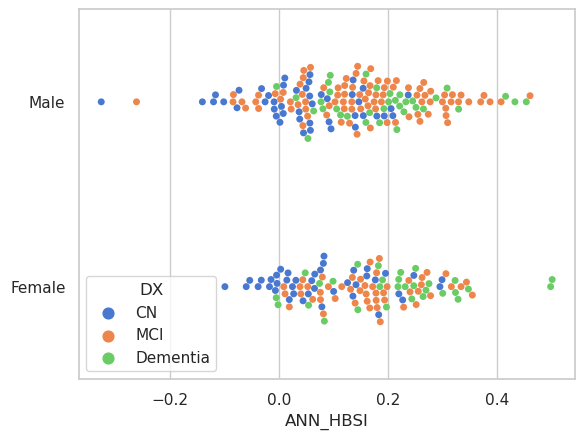

In [9]:
# Your answer to Step 6
# Below put your code for visualising the data
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=adni_bsi_dataset, x="ANN_HBSI", y="PTGENDER", hue="DX")
ax.set(ylabel="")

[Text(0, 0.5, 'APOE e4 allele frequency')]

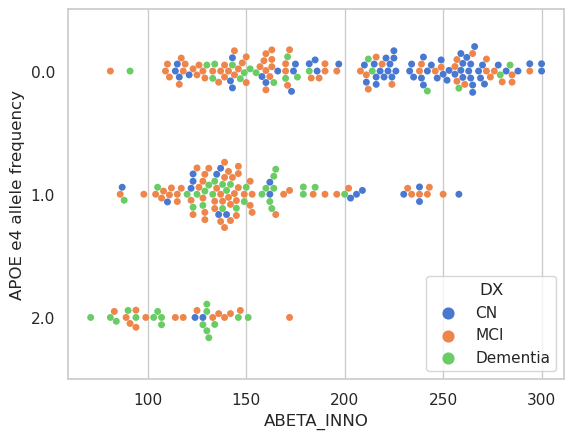

In [18]:
ax = sns.swarmplot(data=adni_bsi_dataset, x="ABETA_INNO", y="APOE4", hue="DX")
ax.set(ylabel="APOE e4 allele frequency")

[Text(0, 0.5, 'APOE e4 allele frequency')]

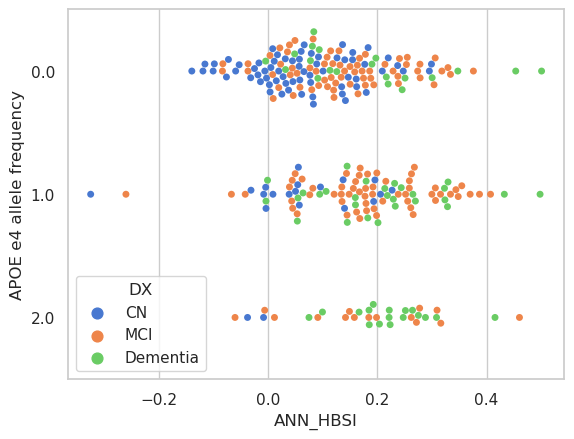

In [19]:
ax = sns.swarmplot(data=adni_bsi_dataset, x="ANN_HBSI", y="APOE4", hue="DX")
ax.set(ylabel="APOE e4 allele frequency")